In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
train_dir = 'dataset/train'  
val_dir = 'dataset/val'

In [80]:
img_height, img_width = 128, 128
batch_size = 32

In [82]:
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)
val_data = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2 images belonging to 3 classes.
Found 2 images belonging to 3 classes.


In [84]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [86]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.3423 - val_accuracy: 0.5000 - val_loss: -10.1341
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5000 - loss: -9.8458 - val_accuracy: 0.5000 - val_loss: -25.2585
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5000 - loss: -21.3031 - val_accuracy: 0.5000 - val_loss: -46.1359
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.5000 - loss: -42.5599 - val_accuracy: 0.5000 - val_loss: -74.5692
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.5000 - loss: -51.3004 - val_accuracy: 0.5000 - val_loss: -112.8415
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.5000 - loss: -139.9221 - val_accuracy: 0.5000 - val_loss: -163.1499
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5000 - loss: -159.5802 - val_accuracy: 0.5000 - val_loss: -227.0127
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5000 - loss: -285.9294 - va

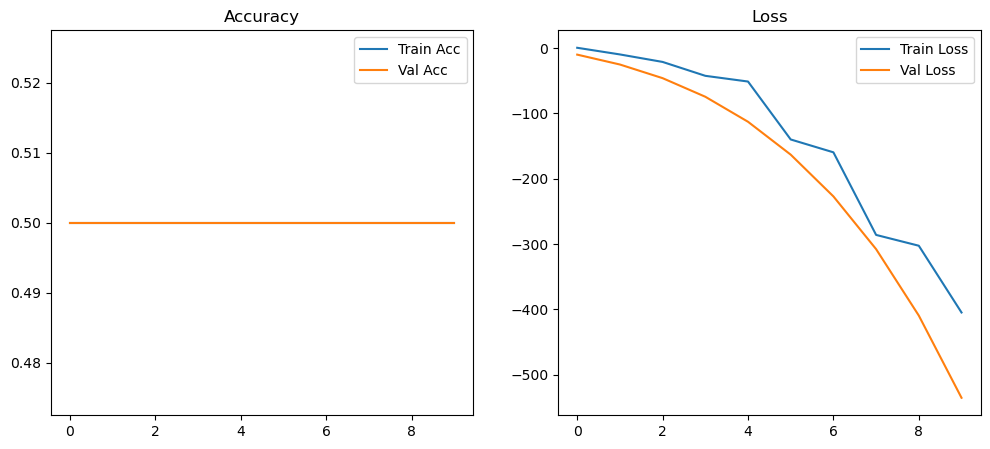

In [87]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [92]:
def display_prediction(data_gen, model, class_labels):
    x, y = next(data_gen)
    predictions = (model.predict(x) > 0.5).astype("int32")

    num_images = min(len(x), 6)  # Only plot as many images as are available
    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(x[i])
        label = "actual" if predictions[i][0] == 1 else "Fake"
        actual = "actual" if y[i] == 1 else "Fake"
        color = "green" if label == actual else "red"
        plt.title(f"Pred: {label}\nActual: {actual}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


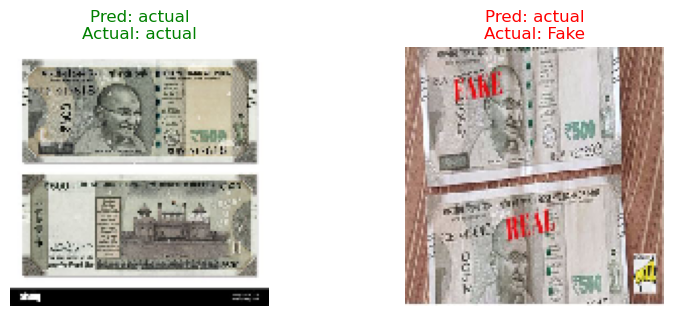

In [94]:
display_prediction(val_data, model, class_labels={0: "Fake", 1: "actual"})
